<a href="https://colab.research.google.com/github/alejandrodgb/fastai/blob/main/clean/04_mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Full MNIST dataset

Complete all the steps in this chapter using the full MNIST datasets (for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You’ll need to do some of your own research to figure out how to overcome obstacles you’ll meet on the way.

# Libraries

In [1]:
# Prepare notebook
from fastai.vision.all import *

In [2]:
# Prepare notebook
from fastbook import *    
matplotlib.rc('image', cmap='Greys')

# Data

In [3]:
# Get MNIST data. Return object is the path where data is located
path = untar_data(URLs.MNIST)

In [4]:
# Set BASE_PATH of Path to the MNIST data location
Path.BASE_PATH = path

In [5]:
# Review contents of path
path.ls()

(#2) [Path('testing'),Path('training')]

In [6]:
# Review contents of train folder
(path/'training').ls()

(#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')]

In [7]:
train_nums_paths = [(path/'training'/f'{i}').ls() for i in range(10)]

In [8]:
# Review one image
im_path = train_nums_paths[1][1]
im = Image.open(im_path)
im

In [9]:
# Create a dataframe colour map of image
imt = tensor(im)
df = pd.DataFrame(imt)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,212,253,56,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,252,252,139,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,252,252,45,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,233,252,195,9,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,253,252,79,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,255,253,69,0,0,0,0,0,0,0,0,0


# Baseline

We will create a baseline calculation to check whether the number is a 3 or a 7. We will be calculating the average digit by calculating the average for each position in the image.

In [10]:
train_nums_paths[0]

(#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...]

In [11]:
# Create a list of tensors
train_nums_tens = []

for p in train_nums_paths:
    train_nums_tens.append([tensor(Image.open(i)) for i in p])

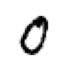

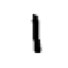

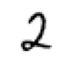

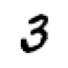

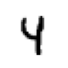

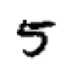

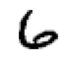

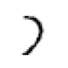

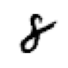

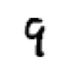

In [12]:
# Review the list of tensors
for i in train_nums_tens:
    show_image(i[np.random.randint(0,len(i))])

In [13]:
# Stack the tensors and normalise them between 0 and 1
train_stacked_nums = []
for i in train_nums_tens:
    train_stacked_nums.append(torch.stack(i).float()/255)

[i.shape for i in train_stacked_nums]

[torch.Size([5923, 28, 28]),
 torch.Size([6742, 28, 28]),
 torch.Size([5958, 28, 28]),
 torch.Size([6131, 28, 28]),
 torch.Size([5842, 28, 28]),
 torch.Size([5421, 28, 28]),
 torch.Size([5918, 28, 28]),
 torch.Size([6265, 28, 28]),
 torch.Size([5851, 28, 28]),
 torch.Size([5949, 28, 28])]

In [14]:
# Check the stacked tensors size
np.array([i.shape[0] for i in train_stacked_nums])==np.array([len(i) for i in train_nums_paths])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [15]:
# Review rank of tensor. 
[i.ndim for i in train_stacked_nums]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [168]:
# Calculate the average pixel accross all images
nums_means = [i.mean(axis=0) for i in train_stacked_nums]
nums_means_tensor = torch.stack(nums_means,dim=0)

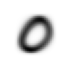

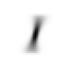

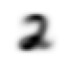

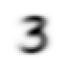

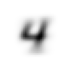

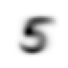

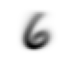

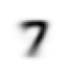

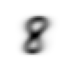

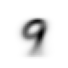

In [169]:
# Display means
for i in nums_means:
    show_image(i)

## Deviation from baseline

### Train data

We'll calculate the L1 and L2 norms for sample numbers in the training dataset. 

Mean absolute difference is called the L1 norm. Root mean squared error is called the L2 norm.  

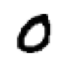

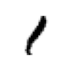

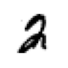

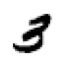

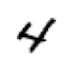

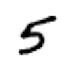

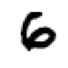

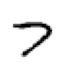

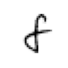

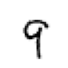

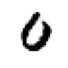

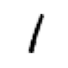

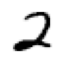

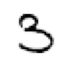

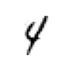

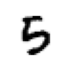

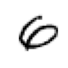

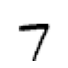

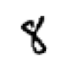

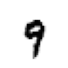

In [260]:
# Create samples tensor
s1 = [i[np.random.randint(len(i))] for i in train_stacked_nums] + [i[np.random.randint(len(i))] for i in train_stacked_nums]
samples = torch.stack(s1,dim=0)
for i in samples:
    show_image(i)

In [261]:
torch.FloatTensor([(samples[0]-i).mean().item() for i in nums_means_tensor])

tensor([0.0429, 0.1403, 0.0673, 0.0748, 0.0949, 0.0876, 0.0790, 0.1018, 0.0662, 0.0937])

In [262]:
samples_L1 = torch.FloatTensor([(i-nums_means_tensor).abs().mean(dim=(1,2)).tolist() for i in samples])
print(samples_L1.shape)
samples_L1

torch.Size([20, 10])


tensor([[0.1178, 0.2220, 0.2052, 0.1930, 0.2075, 0.1786, 0.1962, 0.2047, 0.1957, 0.2019],
        [0.1993, 0.0750, 0.1394, 0.1397, 0.1367, 0.1474, 0.1555, 0.1349, 0.1245, 0.1333],
        [0.1755, 0.1427, 0.1306, 0.1570, 0.1535, 0.1551, 0.1415, 0.1562, 0.1357, 0.1460],
        [0.1834, 0.1641, 0.1729, 0.1567, 0.1714, 0.1597, 0.1810, 0.1797, 0.1513, 0.1600],
        [0.1784, 0.1501, 0.1701, 0.1872, 0.1100, 0.1556, 0.1500, 0.1304, 0.1615, 0.1236],
        [0.1721, 0.1493, 0.1879, 0.1566, 0.1405, 0.1308, 0.1612, 0.1515, 0.1540, 0.1362],
        [0.2120, 0.2122, 0.1825, 0.2177, 0.1980, 0.2246, 0.1625, 0.2284, 0.2037, 0.2088],
        [0.1660, 0.1416, 0.1833, 0.1715, 0.1541, 0.1603, 0.1698, 0.1120, 0.1744, 0.1452],
        [0.1754, 0.0756, 0.1381, 0.1344, 0.1297, 0.1315, 0.1264, 0.1313, 0.1298, 0.1239],
        [0.1779, 0.1117, 0.1559, 0.1488, 0.1098, 0.1341, 0.1449, 0.1121, 0.1315, 0.0942],
        [0.1379, 0.1934, 0.1745, 0.1803, 0.1583, 0.1664, 0.1357, 0.1654, 0.1754, 0.1583],
        [0

In [255]:
torch.diag(samples_L1)

tensor([0.1434, 0.0953, 0.1443, 0.1567, 0.1147, 0.1277, 0.1276, 0.1191, 0.1464, 0.1137])

In [258]:
(samples-nums_means_tensor.view(-1,10,28,28)).abs().mean(dim=(2,3))

tensor([[0.1434, 0.0953, 0.1443, 0.1567, 0.1147, 0.1277, 0.1276, 0.1191, 0.1464, 0.1137]])

In [257]:
(samples-nums_means_tensor).abs().mean(dim=(1,2))

tensor([0.1434, 0.0953, 0.1443, 0.1567, 0.1147, 0.1277, 0.1276, 0.1191, 0.1464, 0.1137])

In [230]:
samples.shape

torch.Size([10, 28, 28])

In [ ]:
# Calculate the L1 and L2 norms for the sample set
print('l1',(samples-nums_means_tensor).abs().mean(dim=(1,2)))
print('l2',((samples-nums_means_tensor)**2).mean(dim=(1,2)).sqrt())

l1 tensor([0.1434, 0.0953, 0.1443, 0.1567, 0.1147, 0.1277, 0.1276, 0.1191, 0.1464, 0.1137])
l2 tensor([0.2491, 0.2306, 0.2531, 0.2838, 0.2216, 0.2261, 0.2408, 0.2374, 0.2676, 0.2220])


In [18]:
# Calculate the L1 and L2 norms for a sample number in the training dataset

print[i[np.random.randint(len(i))] for i in train_stacked_nums] 

for i in train_nums_tens:
    show_image(i[np.random.randint(0,len(i))])

dist_3_abs = (a_3-mean3).abs().mean()
dist_3_sqr = ((a_3-mean3)**2).mean().sqrt()
print(dist_3_abs, dist_3_sqr)

# Calculate L1 and L2 norms with pytorch inbuilt loss functions
F.l1_loss(a_3,mean3), F.mse_loss(a_3,mean3).sqrt()

NameError: name 'a_3' is not defined

In [ ]:
# Calculate the L1 and L2 norms for a sample 7 in the training dataset
dist_7_abs = (a_3-mean7).abs().mean()
dist_7_sqr = ((a_3-mean7)**2).mean().sqrt()
print(dist_7_abs, dist_7_sqr)

# Calculate L1 and L2 norms with pytorch inbuilt loss functions
F.l1_loss(a_3,mean7), F.mse_loss(a_3,mean7).sqrt()

### Validation data

In [ ]:
# Create valid 3s tensor
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

# Create valid 7s tensor
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

In [ ]:
# Function to check the deviation to the average number
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))

In [ ]:
# Calculate the distance between a sample 3 and the average 3
mnist_distance(a_3, mean3)

In [ ]:
# Calculate the distance for all 3s in the dataset
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist.shape, valid_3_dist

In [ ]:
# Create a function to determine whether it is a 3. If the distance between the
# image and the mean3 is less than the distance between the image and the mean
# 7 then it is classified as a 3
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [ ]:
# Calculate the accuracy of the function
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

# SGD

We will be calculating the SGD for a simple function

In [ ]:
def f(x): return x**2

In [ ]:
plot_function(f, 'x','x**2')

We will now calculate the gradients

In [ ]:
# Create a tensor that tracks the required gradients
xt = tensor(3.).requires_grad_()

In [ ]:
# Calculate the function with the given value
yt = f(xt)
yt

In [ ]:
# Calculate the gradients 
yt.backward()

In [ ]:
# Review the gradients
xt.grad

Calculate gradients with a vector

In [ ]:
# Create a tensor that tracks the required gradients
xt = tensor([3., 4., 10.]).requires_grad_()
xt

In [ ]:
# Modify the function to take in a vector and return a scalar
def f(x): return (x**2).sum()

In [ ]:
# Calculate the function given the vector
yt = f(xt)
yt

In [ ]:
# Calculate the gradients
yt.backward()
xt.grad

The gradients calculated are the equivalent of the derivative of $x^2$ where $x=$ `tensor([3.,4.,10.])`

## End-to-end example

In [ ]:
time = torch.arange(0,20).float(); time

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

The function define below allows us to determine both the output from the input and also the type of quadratic equation from the parameters.

In [ ]:
# Define a function that allows us to calculate parameters and input
def f(t, params):
    a,b,c = params
    return a*(t**2)+(b*t)+c

We define a loss function that will return a value based on the prediction and target where lower values correspond to better predictions.

In [ ]:
# Define the loss function
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

## Seven-step SGD process

In [ ]:
# 1. Initialise the weights
params = torch.randn(3).requires_grad_()

In [ ]:
# 2. Calculate the predictions
preds = f(time, params)

In [ ]:
# Create a function to see how close our predictions are to our targets
def show_preds(preds, ax = None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

In [ ]:
show_preds(preds)

In [ ]:
# 3. Calculate the loss
loss = mse(preds, speed)
loss

In [ ]:
# 4. Calculate the gradients
loss.backward()
params.grad

These gradients can then be used to improve the parameters.

In [ ]:
params

In [ ]:
# 5. Step the weights
lr = 1e-5 # LR to update grads
params.data -= lr * params.grad.data # Update params with new weights
params.grad = None # Reset gradients

In [ ]:
# Check if the prediction has improved
preds = f(time, params)
print(mse(preds,speed))
show_preds(preds)

In [ ]:
# Create a function to step the weights
def apply_step(params,lr=1e-3,prn=True):
    # Calculate predictions
    preds = f(time, params)
    # Calculate loss
    loss = mse(preds, speed)
    # Backpropagate loss
    loss.backward()
    # Update parameters
    params.data -= lr*params.grad.data
    # Reset gradients
    params.grad = None
    if prn: print(loss.item())
    return preds


In [ ]:
# 6. Repeat the process
for i in range(10): apply_step(params)

In [ ]:
# Plotting the functions
_, axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params,prn=False),ax)
plt.tight_layout()

# MNIST loss function

In [ ]:
# Change the concatenated train tensors from a list of matrices (rank-3 tensor) 
# to a list of vectors (rank-2 tensor)
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)
train_x.shape

In [ ]:
# Create a tensor of train labels
train_y = tensor([1]*len(threes)+[0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

In [ ]:
# Zip train_x and train_y to create an object in the right shape
# for pytorch Dataset object
dset = list(zip(train_x, train_y))

In [ ]:
# Create validation datasets
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1,28*28)
valid_y = tensor([1]*len(valid_3_tens)+[0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
# 1. Initialising the weights
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
# Initialise the weights
weights = init_params((28*28,1))
weights.shape

The weight will always equal 0 if the pixel is 0 when multiplying weight x pixels. We will add a bias as per the formula of a line: $y=mx+b$

In [ ]:
# Initialise the bias
bias = init_params(1)

In [ ]:
# Prediction for a single image
(train_x[0]*weights.T).sum() + bias

In [ ]:
# Create a function for matrix multiplication
def linear1 (xb): return xb@weights + bias

In [ ]:
# Predictions for all images
preds = linear1(train_x)
preds.shape, preds[0]

In [ ]:
# Check predicted items
corrects = (preds<0.0).float() == train_y
corrects.float().mean().item()

We need to define a loss function that can measure slight changes in the predictions. 

`def mnist_loss(preds, targs): return torch.where(targs==1, 1-preds, preds).mean()`

This function will give us a smaller number the closer the prediction is to the correct value. However, it assumes that predictions will be between 0 and 1. 

We use a sigmoid function to achieve this.

In [ ]:
plot_function(torch.sigmoid, title='sigmoid', min=-4, max=4)

In [ ]:
# Loss function
def mnist_loss(preds, targs):
    preds = preds.sigmoid()
    return torch.where(targs==1, 1-preds, preds).mean()

Calculating the loss over the entire dataset is inefficient while calculating it over a single item is unstable. We use mini-batches to achieve this.

The PyTorch `DataLoader` class provides all the functionality required to shuffle and batch the data.

In [ ]:
# DataLoader functionality example
coll = range(15)
dl = DataLoader(coll, batch_size=4, shuffle=True)
L(dl)

The `DataLoader` class can handle the tuples of inputs and targets for training - called a dataset.

In [ ]:
# DataLoader dataset example
ds = L(enumerate(string.ascii_lowercase))
ds

In [ ]:
dl = DataLoader(ds,batch_size=6,shuffle=True)
list(dl)

# Full implementation

After a full implementation the code will look like:

```python
for x,y in dl:
    pred = model(x)
    loss = loss_func(pred,y)
    loss.backward()
    params -= params.grad*lr
```

In [ ]:
# Initialise the weights
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
## Creating the data loaders

# Training data loader
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
print(xb.shape, yb.shape)

# Validation data loader
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
# Create a batch for testing
batch = train_x[:4]
batch.shape

In [ ]:
# Predict the result
preds = linear1(batch)
preds

In [ ]:
# Calculate the loss
loss = mnist_loss(preds,train_y[:4])
loss

In [ ]:
# Calculate the gradients
loss.backward()
weights.grad.shape, weights.grad.mean(),bias.grad

We create a function from the testing.

In [ ]:
# Create a function to calculate the gradient
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [ ]:
# Testing the function
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

If we run the test function twice, the gradients will have changed because the model will add the gradients of the loss to any gradients that are currently stored. Gradients need to be zeroed.



In [ ]:
weights.grad.zero_()
bias.grad.zero_();

We need to update the weights and biases based on the gradient and learning rate and make sure that we do not take the gradient of this step.

If we assign the values to the data attribute of the parameter, PyTorch will not calculate any gradients.

In [ ]:
# Update weights and biases based on gradients and learning rate
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= lr*p.grad
            p.grad.zero_()

We will also check our model by looking at the accuracy on the validation set.

In [ ]:
# Example accuracy calculation
(preds>0.5).float() == train_y[:4]

This is then used to create our batch accuracy function. We have also passed our predictions through a sigmoid function to make sure they are between 0 and 1.

In [ ]:
# Accuracy calculation function
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5).float() == yb
    return correct.float().mean()

In [ ]:
# Checking our accuracy
batch_accuracy(linear1(batch),train_y[:4])

We then put the batches together to validate the epoch.

In [ ]:
# Validating epoch
def validate_epoch(model):
    accs = [batch_accuracy(model(xb),yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(),4)

In [ ]:
# Checking epoch accuracy
validate_epoch(linear1)

This is the starting point. Now we will be training for one epoch and check whether the accuracy improves.

In [ ]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

Now we train more epochs to check if the accuracy improves

In [ ]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1),end=' ')

## Creating an optimiser

The SGD step in Pytorch is called an optimiser. We will be using PyTorch's inbuilt modules.

`nn.Linear` will replace our `init_params` and `linear` functions.

```python
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()

def linear1 (xb): 
    return xb@weights + bias
```

In [ ]:
linear_model = nn.Linear(28*28,1)

We can review the parameters of the `nn.linear` PyTorch module by accessing it through `.paramters()`

In [ ]:
w,b = linear_model.parameters()
w.shape, b.shape

We now create a basic optimiser.

In [ ]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [ ]:
# Instantiate the optimiser
opt = BasicOptim(linear_model.parameters(), lr)

This will now simplify our epoch training loop. 
Original training loop:
```python
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= lr*p.grad
            p.grad.zero_()
```

In [ ]:
# Train epoch: calculate gradients, update weights, and reset gradients.
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
# Validate training
validate_epoch(linear_model)

In [ ]:
# Model training loop
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model),end=' ')

In [ ]:
# Train model with new optimiser
train_model(linear_model, 20)

The fastai library already provides an SGD class.

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model,20)

The fastai library also provides training model code that would replace `train_model`. The learner needs:
- Dataloaders
- Model
- Optimisation function
- Loss function
- Metrics

In [ ]:
# Create dataloader
dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss,
                metrics=batch_accuracy)

In [ ]:
# Fit (train)
learn.fit(10, lr)

# Adding nonlinearity

To increase the number of tasks that we can complete we need to add a nonlinearity between the linear classifiers.

The simple neural network below adds a nonlinearity between the two linear classifiers.

In [ ]:
# Simple neural network
def simple_net(xb):
    res = xb@w1+b1
    res = res.max(tensor(0.0))
    res = res@w2+b2
    return res

In [ ]:
# Initialise tensors
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

`w1` has 30 output activations so `w2` must have 30 input activations to match.

The `res.max(tensor(0.0))` function is known as Rectified Linearu Unit (ReLU). This is available in PyTorch's functional module `nn.functional as F`

In [ ]:
plot_function(F.relu)

Nonlinearities are added to make sure that each linear layer can work on its own. If linear layers are set one after the other they can be simplified to a single layer. 

Nonlinearities are also known as activation functions.

We can simplify the simple net with inbuilt PyTorch functions:
```python
# Simple neural network
def simple_net(xb):
    res = xb@w1+b1
    res = res.max(tensor(0.0))
    res = res@w2+b2
    return res
```

In [ ]:
# Simple neural network in PyTorch
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

By using `nn.Sequential` we can get the parameters of all modules within it.

In [ ]:
# Training using Learner
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss,
                metrics=batch_accuracy)
learn.fit(40, 0.1)

The training process is recorded in `learner.recorder`. This gives us access to training metrics.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
itm = ['Learning Rate','Loss','Accuracy']
for i in range(3):
    ax[i].plot(L(learn.recorder.values).itemgot(i))
    ax[i].set_title(itm[i])
    ax[i].grid()
    
print(f'Final accuracy = {learn.recorder.values[-1][2]:.4f}')

Using deeper models pefroms better than using shallower models with larger matrices. If we have deep models with small matrices, we are able to perform better using less memory than shallower models with large matrices.

The following example uses an 18-layer-deep model fit with a single cycle.

In [ ]:
#dls = ImageDataLoaders.from_folder(path,num_workers=0)
#learn = vision_learner(dls,resnet18,pretrained=False,loss_func=F.cross_entropy,metrics=accuracy)
#learn.fit_one_cycle(1,0.1)

# Further Research

## Learner implementation

Create your own implementation of Learner from scratch, based on the training loop shown in this chapter.

Learner components:
- Dataloader
- Model
- Optimiser
- Loss function
- Metrics

In [ ]:
# Accuracy calculation function
def batch_accuracy1(xb, yb):
    correct = (xb>0.5).float() == yb
    return correct.float().mean()

In [ ]:
class Lrner:
    def __init__(self, dls, model, opt,loss_fn, metric):
        self.dl_train = dls[0]
        self.dl_valid = dls[1]
        self.model = model
        self.opt = opt(self.model.parameters(),lr=0.001)
        self.loss = loss_fn
        self.metric = metric
        
    def cal_grad(self, xb, yb):
        preds = self.model(xb)
        loss = self.loss(preds, yb)
        loss.backward()
    
    def train_epoch(self):
        for xb, yb in self.dl_train:
            xb, yb = xb.float(), yb.float()
            self.cal_grad(xb, yb)
            self.opt.step()
            self.opt.zero_grad()

    def validate_epoch(self):
        accs = [self.metric(self.model(xb),yb) for xb, yb in self.dl_valid]
        return round(torch.stack(accs).mean().item(),4)

    def fit(self, epochs):
        for i in range(epochs):
            self.train_epoch()
            print(self.validate_epoch(),end=' ')

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1),
    nn.Sigmoid()
)

In [ ]:
learner = Lrner(dls, simple_net, SGD, mnist_loss, batch_accuracy1)
learner.fit(100)